<a href="https://colab.research.google.com/github/imharshmishra87/Ml-models/blob/main/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ridge Regression
Ridge regression is a statistical technique used in machine learning to improve the accuracy and stability of linear regression models, especially when dealing with multicollinearity (high correlation between independent variables). It reduces overfitting by adding a penalty (known as L2 regularization) to the model's coefficients, shrinking their magnitude and making them more stable, while still keeping all variables in the model.

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1, noise=20,random_state=13)

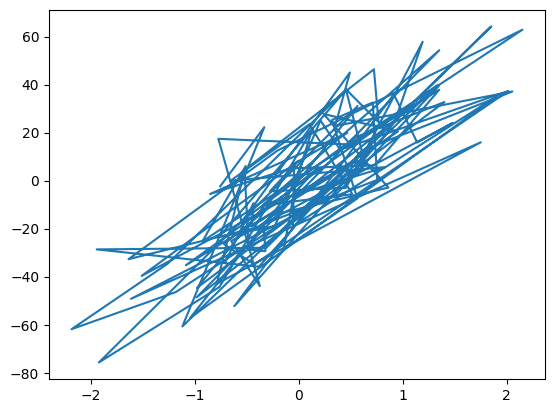

In [ ]:
plt.plot(x,y)

In [ ]:
lr=LinearRegression()
lr.fit(x,y)
print(f"The coef value is :{lr.coef_}")
print(f"The intercept value is :{lr.intercept_}")

The coef value is :[27.82809103]
The intercept value is :-2.29474455867698


In [ ]:
from sklearn.linear_model import Ridge
rid=Ridge(alpha=10)
rid.fit(x,y)

Ridge(alpha=10)

In [ ]:
print(f"The intercept value is : {rid.intercept_}")
print(f"The coefficent value is : {rid.coef_}")

The intercept value is : -2.1269130035235735
The coefficent value is : [24.9546267]


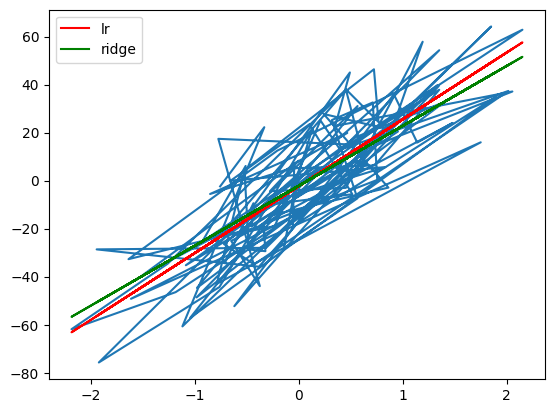

In [ ]:
plt.plot(x,y)
plt.plot(x,lr.predict(x),color='red', label="lr")
plt.plot(x,rid.predict(x),color='green', label="ridge")
plt.legend()

# Ridge Regression From Scratch(1D)


In [ ]:
class ridgeregression:
  def __init__(self,alpha=0.1):
    self.alpha=alpha
    self.m=None
    self.b=None

  def fit(self,X_train,y_train):
    num=0
    deno=0
    for i in range(X_train.shape[0]):
      num=num+(X_train[i]-X_train.mean())*(y_train[i]-y_train.mean())
      deno=deno+(X_train[i]-X_train.mean())*(X_train[i]-X_train.mean())
    self.m=num/(deno+ self.alpha)
    self.b=y_train.mean()-(self.m*X_train.mean())


  def test(self,X_test):
    y_predict=self.m*X_test + self.b
    return y_predict



In [ ]:
rd=ridgeregression(alpha=10)
rd.fit(x,y)

In [ ]:
np.sum(x-np.mean(x)*(y-np.mean(y)))/(np.sum((x-np.mean(x))**2))

np.float64(6.725468473795575)

In [ ]:
sum=0
for i in range(x.shape[0]):
  sum=sum+(x[i]-x.mean())*(y[i]-y.mean())
print(sum)




[2416.73305605]


# Nd ridge regression


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [ ]:
X,y=load_diabetes(return_X_y=True)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
rr=Ridge(alpha=0.1,solver='cholesky')
rr.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [ ]:
y_pred=rr.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))


0.4757211383676625


# Ridge Regression From Scratch(ND)

In [ ]:
class myridge:
  def __init__(self,alpha=0.1) -> None:
    self.alpha=alpha
    self.m=None
    self.b=None

  def fit(self,X_train,y_train):
    X_train=np.insert(X_train,0,1,axis=1)
    I=np.identity(X_train.shape[1])
    I[0][0]=0
    w=np.linalg.inv(np.dot(np.transpose(X_train),X_train)+ np.dot(self.alpha,I)).dot(np.transpose(X_train)).dot(y_train)
    self.b=w[0]
    self.m=w[1:]
    return self.m

  def predict(self, X_test):
    y_pred=np.dot(X_test,self.m) + self.b
    return y_pred



In [ ]:
rr.coef_

array([ -27.78697695, -217.40422513,  495.41070579,  256.39289943,
        -75.91556097,  -83.58447815, -198.13452094,  100.59731067,
        468.79626887,   95.78799104])

In [ ]:
mr=myridge(alpha=0.1)
mr.fit(X_train,y_train)

array([ -27.78697695, -217.40422513,  495.41070579,  256.39289943,
        -75.91556097,  -83.58447815, -198.13452094,  100.59731067,
        468.79626887,   95.78799104])

In [ ]:
y_pred=mr.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pred))

0.4757211383676625


In [ ]:
X_train

array([[-0.0854304 ,  0.05068012, -0.02237314, ..., -0.03949338,
        -0.07213275, -0.01764613],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       [-0.06726771,  0.05068012, -0.01267283, ...,  0.03430886,
         0.01919647, -0.03421455],
       ...,
       [ 0.02354575, -0.04464164, -0.03638469, ...,  0.03430886,
        -0.03324559,  0.06105391],
       [ 0.00175052,  0.05068012,  0.01103904, ...,  0.03430886,
         0.02405509,  0.02377494],
       [ 0.01264814, -0.04464164,  0.01535029, ..., -0.00259226,
         0.04506655, -0.06735141]])

In [ ]:
np.transpose(X_train)

array([[-0.0854304 ,  0.08529891, -0.06726771, ...,  0.02354575,
         0.00175052,  0.01264814],
       [ 0.05068012,  0.05068012,  0.05068012, ..., -0.04464164,
         0.05068012, -0.04464164],
       [-0.02237314,  0.04445121, -0.01267283, ..., -0.03638469,
         0.01103904,  0.01535029],
       ...,
       [-0.03949338, -0.00259226,  0.03430886, ...,  0.03430886,
         0.03430886, -0.00259226],
       [-0.07213275,  0.00286131,  0.01919647, ..., -0.03324559,
         0.02405509,  0.04506655],
       [-0.01764613, -0.02593034, -0.03421455, ...,  0.06105391,
         0.02377494, -0.06735141]])

In [ ]:
X_train.T

array([[-0.0854304 ,  0.08529891, -0.06726771, ...,  0.02354575,
         0.00175052,  0.01264814],
       [ 0.05068012,  0.05068012,  0.05068012, ..., -0.04464164,
         0.05068012, -0.04464164],
       [-0.02237314,  0.04445121, -0.01267283, ..., -0.03638469,
         0.01103904,  0.01535029],
       ...,
       [-0.03949338, -0.00259226,  0.03430886, ...,  0.03430886,
         0.03430886, -0.00259226],
       [-0.07213275,  0.00286131,  0.01919647, ..., -0.03324559,
         0.02405509,  0.04506655],
       [-0.01764613, -0.02593034, -0.03421455, ...,  0.06105391,
         0.02377494, -0.06735141]])

# Ridge Regression Using Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [ ]:
sgd=SGDRegressor(penalty='l2',alpha=0.001,learning_rate='constant',max_iter=500,eta0=0.01)

In [ ]:
X,y=load_diabetes(return_X_y=True)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=True)

In [ ]:
sgd.fit(X_train,y_train)

SGDRegressor(alpha=0.001, learning_rate='constant', max_iter=500)

In [ ]:
sgd.coef_

array([  30.61134919,  -92.69299392,  366.52163238,  218.09337601,
         11.4181793 ,  -30.73416889, -170.26628161,  134.71745965,
        291.87021166,  121.88004549])

In [ ]:
sgd.intercept_

array([150.28287586])

In [ ]:
sgd_pred=sgd.predict(X_test)

In [ ]:
print(r2_score(y_test,sgd_pred))

0.31080778134625087


# Creating Ridge Class (Gradient Descent)


In [ ]:
class myridge:
  def __init__(self, learning_rate, epochs,alpha):
    self.coefs=None
    self.intercept=None
    self.rate=learning_rate
    self.epochs=epochs
    self.alpha=alpha

  def fit(self, X_train, y_train):
    self.coefs=np.ones(X_train.shape[1])
    self.intercept=0
    theta=np.insert(self.coefs,0,self.intercept)
    # We are not regularizing the first value that's why it is done 0

    X_train=np.insert(X_train, 0,1,axis=1)

    for i in range(self.epochs):
      y_pred=np.dot(X_train,theta)
      error=(y_pred-y_train)
      reg=self.alpha*theta
      reg[0]=0
      grad=X_train.T.dot(error) + reg
      theta-=self.rate*grad

    self.coefs=theta[1:]
    self.intercepts=theta[0]

  def predict(self, X_test):
    return np.dot(X_test,self.coefs) + self.intercept



In [ ]:
my=myridge(0.001,1000,0.1)
my.fit(X_train,y_train)

In [ ]:
y_pred=my.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(r2_score(y_test,y_pred))

-4.955494519974439
